In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data/final_data.csv')
data.dropna(inplace = True)
data.head()

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss
0,BOS,1984,0.722218,1.445467,0.439962,1.151077,1.084341,1.733788,0.145440,0.984298,...,1.560378,1.631836,1.134881,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129,0.756
1,NJN,1984,-0.663271,-0.349592,-0.982110,-0.497881,-0.305562,-0.929770,-1.083423,-1.080527,...,0.168776,0.223381,0.607876,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690,0.549
2,NYK,1984,-0.941947,-0.510126,-0.788466,-0.509214,0.405433,-0.385286,-0.783936,-0.415986,...,-0.661303,-0.552811,0.229672,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871,0.573
3,WSB,1984,0.433828,2.233541,2.424811,2.596040,-0.036195,0.468230,0.479706,0.680508,...,0.217604,0.272215,0.074670,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759,0.427
4,ATL,1984,-0.340880,-0.977133,-1.989662,-1.319527,-1.051179,-1.400676,-1.759683,-1.664374,...,0.119947,0.207960,0.149071,-0.206483,-0.157948,-0.544649,0.915483,0.116833,-0.361622,0.488


In [10]:
train = data.copy()[data['Year'] <= 2013]
test = data.copy()[data['Year'] > 2013]

In [11]:
X_train, y_train = train.drop(columns = ['Tm', 'Year', 'WinLoss']), train['WinLoss']
X_test, y_test = test.drop(columns = ['Tm', 'Year', 'WinLoss']), test['WinLoss']

In [28]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.41558999682904807

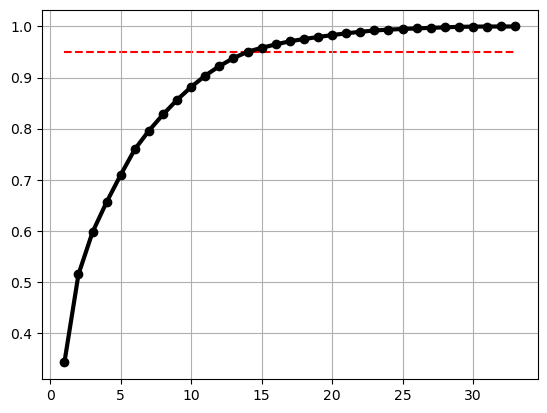

In [56]:
pca = PCA()
pca.fit(X_train)
ks = np.arange(1, X_train.shape[1] + 1)
plt.plot(ks, np.cumsum(pca.explained_variance_ratio_), 'k-o', linewidth = 3)
plt.plot([1, X_train.shape[1]], [.95, .95], zorder = -1, linestyle = '--', c = 'red')
plt.grid()
plt.show()

In [57]:
R2 = []
for k in ks :
    X_train_norm = pca.transform(X_train)[:,:k]
    X_test_norm = pca.transform(X_test)[:,:k]

    reg = LinearRegression()
    reg.fit(X_train_norm, y_train)
    y_pred = reg.predict(X_test_norm)
    R2.append(r2_score(y_test, y_pred))

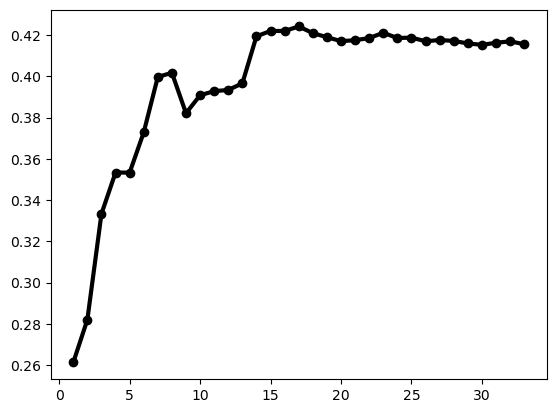

In [63]:
plt.plot(ks, R2, 'k-o', linewidth = 3)
# There seems to be a only a slight edge at around 15 principal components

In [81]:
pred_df = test.copy()[['Year', 'Tm', 'WinLoss', 'Pred']].rename(columns = {'WinLoss': 'Real'})
pred_df['Real'] = round(pred_df['Real'] * 82)
pred_df['Pred'] = pred_df['Pred'] * 82

In [83]:
pred_df.to_csv('data/pred_test_LR.csv', index = None)